

# **1. THE PROBLEM**


- The most common way to measure scoring in the NBA (National Basketball Association) is through a statistic called points per game. This statistic is calculated by taking the total points a player scored throughout the season and dividing it by the number of games played.
- This statistic is great for getting a rough idea of how good a player is at scoring, **but the issue with this stat that it is not standarized.** A player can boost their points per game (ppg) by taking a lot of shot attempts, playing more minutes than the average player, etc.
***This project seeks to fix this problem by calculating a new, unique, and intuitive statistic called true points per possession (tppp) which seeks to improve upon points per game by standardizing it.**
- After calcualting this new statistic, I will be testing its effectiveness with regression analysis.
- [This youtube video](https://www.youtube.com/watch?v=6WMNEt7gIHE&t=264s) made by me sums up the points of this notebook without code.



**- The first step is to import the dataset as well as all of the libraries that I will use for my analysis.**

In [ ]:
from google.colab import drive # link my google drive to this colab notebook
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # pandas is the main library I will be preforming my analysis with
import matplotlib.pyplot as plt # for visualization
import numpy as np # for regression analysis
import seaborn as sns # for visualization


# **2. DATA CLEANING**

- **The spreadsheet that I am using is the game log of Damian Lillard since 2021. I chose to use the Trailblazers Point Guard Damian Lillard because he rarely misses games, and has a very high points per game.**
- **The data set looks like this:**

In [ ]:
dataframe = pd.read_excel('/content/drive/MyDrive/Dame Lillard 2021 Game Log.xlsx') # put the spreadsheet into a data frame
dataframe.head(8)

,Unnamed: 0,NAME,DATE,TM,Unnamed: 4,OPP,RESULT,TEAM FGA,PTS/POSS,PTS,...,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,PF,'+/-
0,Damian Lillard,Damian Lillard,2023-03-22,POR POR,@,UTA UTA,W,93,1.11,30,...,19,42.1,2,10,20.0,12,14,85.7,1,18
1,Damian Lillard,Damian Lillard,2023-03-19,POR POR,vs,LAC LAC,L,82,0.87,21,...,17,23.5,1,8,12.5,12,13,92.3,0,-20
2,Damian Lillard,Damian Lillard,2023-03-17,POR POR,vs,BOS BOS,L,79,1.27,41,...,23,52.2,6,15,40.0,11,14,78.6,3,-14
3,Damian Lillard,Damian Lillard,2023-03-14,POR POR,vs,NYK NYK,L,99,1.27,38,...,26,42.3,8,17,47.1,8,9,88.9,3,-5
4,Damian Lillard,Damian Lillard,2023-03-10,POR POR,@,PHI PHI,L,80,1.03,22,...,15,40.0,2,8,25.0,8,8,100.0,2,3
5,Damian Lillard,Damian Lillard,2023-03-08,POR POR,@,BOS BOS,L,82,1.09,27,...,16,43.8,2,8,25.0,11,11,100.0,2,-16
6,Damian Lillard,Damian Lillard,2023-03-06,POR POR,@,DET DET,W,78,0.89,31,...,28,35.7,6,14,42.9,5,6,83.3,0,8
7,Damian Lillard,Damian Lillard,2023-03-05,POR POR,@,ORL ORL,W,83,1.18,41,...,25,40.0,4,16,25.0,17,20,85.0,2,10


**2A.) The spreadsheet came with a duplicate name column, so I must drop it.**




In [ ]:
dataframe = dataframe.drop(dataframe.columns[0], axis=1) # clear the duplicate name column

**2B.) The spreadsheet has 'W' for wins and 'L' for losses. Python/Pandas works much better if we make this binary (1 and 0), so we are making W = 1, and L = 0. Additionally, there are some random spaces in this 'RESULT' Column, so we must account for this as well.**

In [ ]:
dataframe['RESULT'] = dataframe['RESULT'].replace({'W':1,'L':0,'W ':1,'L ':0}) # replaces W with 0 and L with 1 to make analysis easier later on

**2C.) I am making a '% OF TEAM SHOTS TAKEN' column that will be used later for my analysis. More on this later**

In [ ]:
dataframe['% OF TEAM SHOTS TAKEN'] = dataframe['FGA'] / dataframe['TEAM FGA'] # creates the % of team shots taken statistic that is needed to calculate TPPP


In [ ]:
dataframe['% OF TEAM SHOTS TAKEN'].mean()

0.23297213386153887

**2D.) Here I am calcualting a statistic called Points Per Posession. More on this in the next section**

---



In [ ]:
dataframe['PTS/POSS'] = dataframe['PTS'] / dataframe['POSS'] # creates the pts/team poss column


In [ ]:
dataframe['PTS/POSS'].mean() # mean pts/poss of damian lillard

0.29823958705390335

In [ ]:
dataframe.head(5)

,DATE,TM,Unnamed: 4,OPP,RESULT,TEAM FGA,PTS/POSS,PTS,POSS,MIN,...,FG%,3PM,3PA,3P%,FTM,FTA,FT%,PF,'+/-,% OF TEAM SHOTS TAKEN
0,2023-03-22,POR POR,@,UTA UTA,1,93,0.284091,30,105.6,34,...,42.1,2,10,20.0,12,14,85.7,1,18,0.204301
1,2023-03-19,POR POR,vs,LAC LAC,0,82,0.229258,21,91.6,39,...,23.5,1,8,12.5,12,13,92.3,0,-20,0.207317
2,2023-03-17,POR POR,vs,BOS BOS,0,79,0.411647,41,99.6,37,...,52.2,6,15,40.0,11,14,78.6,3,-14,0.291139
3,2023-03-14,POR POR,vs,NYK NYK,0,99,0.381910,38,99.5,39,...,42.3,8,17,47.1,8,9,88.9,3,-5,0.262626
4,2023-03-10,POR POR,@,PHI PHI,0,80,0.235546,22,93.4,39,...,40.0,2,8,25.0,8,8,100.0,2,3,0.187500


# **3. DATA ANALYSIS AND VISUALIZATION**

- I have finished the preliminary cleaning stage, so now it is time to ***fix the stated problem.***
- As I mentioned previously, the issue with the points per game is that it is not standardized. A player can jack up their points per game by playing more minutes per game than their competitors, and by shooting more shots than they should.
- **Lets look at Damian Lillard on December 30 of 2021.**

In [ ]:
df = dataframe.loc[35]
df1 = df.to_frame()
df1 = df1.reset_index()
print(df1)

                    index                   35
0                    DATE  2022-12-30 00:00:00
1                      TM              POR POR
2              Unnamed: 4                    @
3                     OPP              GSW GSW
4                  RESULT                    0
5                TEAM FGA                   91
6                PTS/POSS             0.361702
7                     PTS                   34
8                    POSS                 94.0
9                     MIN                   42
10                    REB                    8
11                    AST                    5
12                    STL                    0
13                    BLK                    1
14                    TOV                    3
15                    FGM                   12
16                    FGA                   29
17                    FG%                 41.4
18                    3PM                    4
19                    3PA                   15
20           

- He scored 34 points (8th row) which seems to be an impressive amount considering the highest points per game scorer that season (Giannis Antetokounmpo) averaged 29.9 points per game.
- However, what 34 points does not tell us is that** he played 42 minutes** (10th row) **which is 6.2 minutes more than his average that season.**
- Additionally, **he attempted 29 shots** (17th row), **which was 10 more than his average.**
- All of a sudden, his 34 points, which was 6.2 points higher than his average, **does not seem as impressive when factoring in that he played 42 minutes and took 29 shots.**



Slope: 0.814362692921767, Intercept: -0.15937111938976092, R-value: 0.33285154529138833


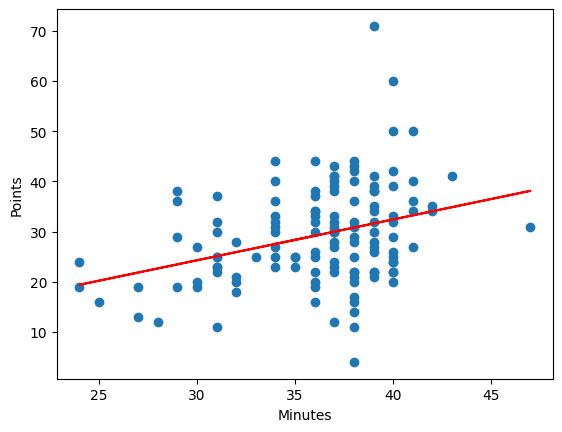

In [ ]:
x = dataframe['MIN']
y = dataframe['PTS']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
correlation_coefficient = np.corrcoef(x, y)[0,1]

print(f'Slope: {slope}, Intercept: {intercept}, R-value: {correlation_coefficient}')

# Generate predicted y values for the regression line
y_pred = slope * x + intercept

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Minutes')
plt.ylabel('Points')
plt.show()

- As you can see here, there is a ***clear correlation between minutes and points.***
- The obvious solution to this is to measure points ***per possession*** rather than per game.
- Doing so allows us to ***standardize*** this statistic.
- Factors such as minutes played and shots attempted do not matter, as we are simply measuring how many points a player scores ***per possession.***
- I can prove that points per possession has a strong correlation with winning than points per game with regressional analysis.

**Here, I am regressing points scored per game ('PTS') on Wins ('Result')** **bold text**

Slope: 3.47186147186146, Intercept: 27.57575757575759, R-value: 0.17591088053834217


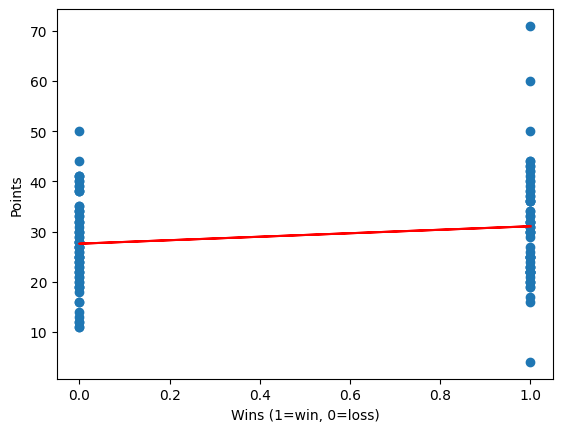

In [ ]:
x = dataframe['RESULT']
y = dataframe['PTS']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
correlation_coefficient = np.corrcoef(x, y)[0,1]

print(f'Slope: {slope}, Intercept: {intercept}, R-value: {correlation_coefficient}')

# Generate predicted y values for the regression line
y_pred = slope * x + intercept

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Wins (1=win, 0=loss)')
plt.ylabel('Points')
plt.show()

**Here, I am regressing points per possession per game ('PTS/POSS') on Wins ('Result')**

Slope: 0.038311890139531735, Intercept: 0.2795291290787832, R-value: 0.18335307203598475


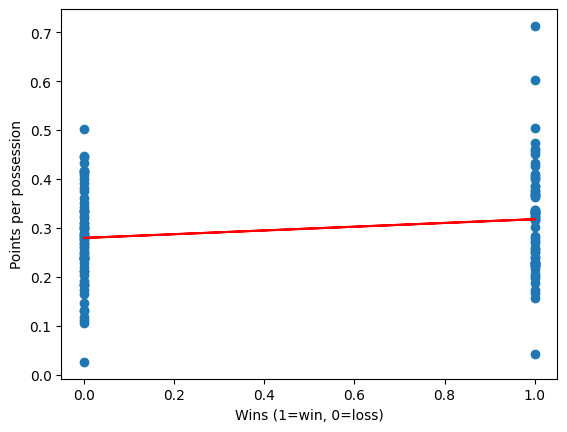

In [ ]:
x = dataframe['RESULT']
y = dataframe['PTS/POSS']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
correlation_coefficient = np.corrcoef(x, y)[0,1]

print(f'Slope: {slope}, Intercept: {intercept}, R-value: {correlation_coefficient}')

# Generate predicted y values for the regression line
y_pred = slope * x + intercept

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Wins (1=win, 0=loss)')
plt.ylabel('Points per possession')
plt.show()

- As you can see, **the correlation coefficient/r-value is higher for the points per possession regression than the points per game regression (0.17591 vs 0.18335).**
- This means that there is a stronger correlation between **points per possession and winning** than there is with **points per game and winning.**
- However, the difference in the correlation coeffcients are quite small (~0.00744). **This is almost negligible**, so what is the issue?
- The issue is that while points per possession measures scoring better than points per game as evident by the regression, **this is still a flawed statistic.**
- This is because **points per game does not take into account the percentage of team shots taken.**
- **If a player takes a large percentage of their team's shots (say 50%) then their points per possession skyrockets.**
- Lets look at Damian Lillard once again. If we regress points per possession on percentage of team shots taken, we see an obvious correlation


Slope: 0.3684403886261656, Intercept: 0.12308862450369154, R-value: 0.680079507926203


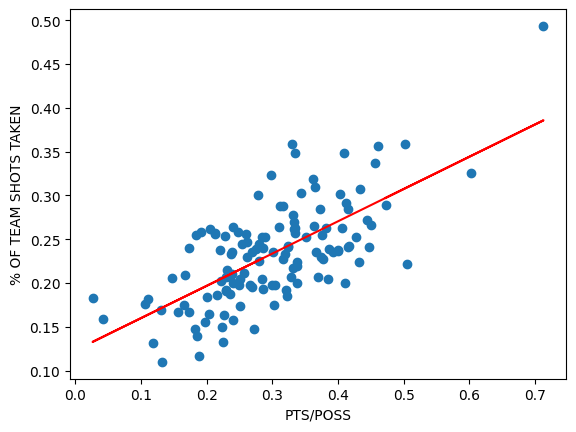

In [ ]:
x = dataframe['PTS/POSS']
y = dataframe['% OF TEAM SHOTS TAKEN']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
correlation_coefficient = np.corrcoef(x, y)[0,1]

print(f'Slope: {slope}, Intercept: {intercept}, R-value: {correlation_coefficient}')

# Generate predicted y values for the regression line
y_pred = slope * x + intercept

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('PTS/POSS')
plt.ylabel('% OF TEAM SHOTS TAKEN')
plt.show()

- The correlation coefficient is .68008 which **implies a strong positive correlation between points per possession and % of team shots taken.** So how do we fix this?
- The solution is by multiplying points per possession by (1-% of team shots taken).
- Doing this evens out the effect that the % of team shots taken has on points per possession
- This is what I am now calling **True Points Per Possession.**

In [ ]:
dataframe['TRUE POINTS PER POSSESSION'] = dataframe['PTS/POSS'] * (1-dataframe['% OF TEAM SHOTS TAKEN']) # creates the % of team shots taken statistic that is needed to calculate TPPP
dataframe.head(3)

,DATE,TM,Unnamed: 4,OPP,RESULT,TEAM FGA,PTS/POSS,PTS,POSS,MIN,...,3PM,3PA,3P%,FTM,FTA,FT%,PF,'+/-,% OF TEAM SHOTS TAKEN,TRUE POINTS PER POSSESSION
0,2023-03-22,POR POR,@,UTA UTA,1,93,0.284091,30,105.6,34,...,2,10,20.0,12,14,85.7,1,18,0.204301,0.226051
1,2023-03-19,POR POR,vs,LAC LAC,0,82,0.229258,21,91.6,39,...,1,8,12.5,12,13,92.3,0,-20,0.207317,0.181729
2,2023-03-17,POR POR,vs,BOS BOS,0,79,0.411647,41,99.6,37,...,6,15,40.0,11,14,78.6,3,-14,0.291139,0.291800


In [ ]:
dataframe['TRUE POINTS PER POSSESSION'].mean()

0.22473865699340137

Slope: 0.02895783992387559, Intercept: 0.2105964561003459, R-squared: 0.2131356269092297


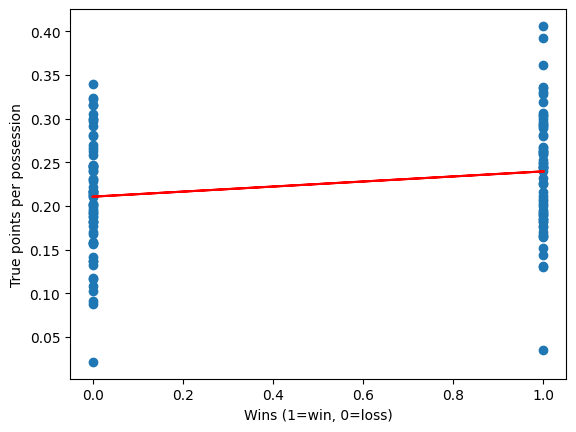

In [ ]:
x = dataframe['RESULT']
y = dataframe['TRUE POINTS PER POSSESSION']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
correlation_coefficient = np.corrcoef(x, y)[0,1]

print(f'Slope: {slope}, Intercept: {intercept}, R-squared: {correlation_coefficient}')

# Generate predicted y values for the regression line
y_pred = slope * x + intercept

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Wins (1=win, 0=loss)')
plt.ylabel('True points per possession')
plt.show()

- As you can see, the correlation coefficient in this regression is greater than any correlation coefficient we have seen. (0.21316 > 0.18335 > 0.17591).
- This proves that true points per posession has a **greater impact on winning games than both points per posession AND points per game.**

- Here is **side-by-side visualization** of by **how much TPPP outperforms Points per game.**

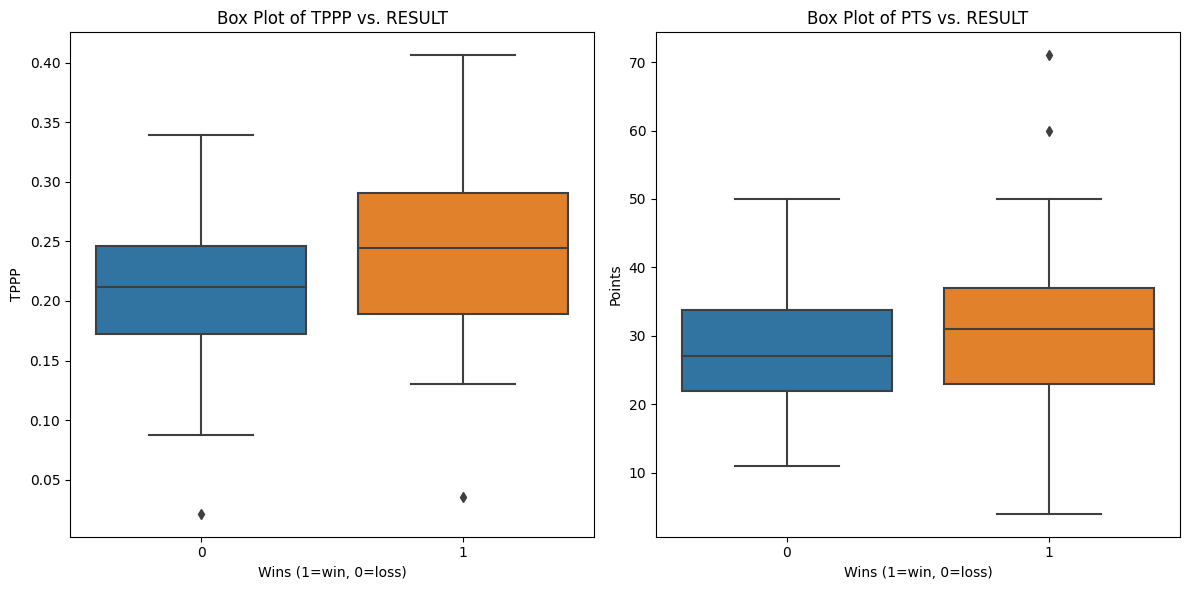

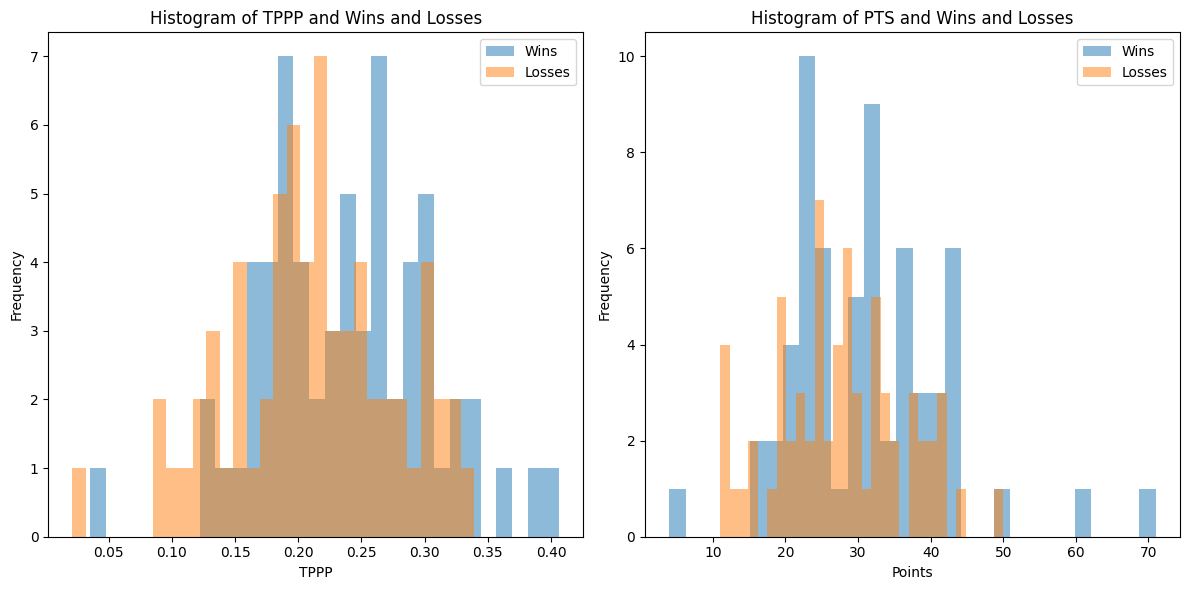

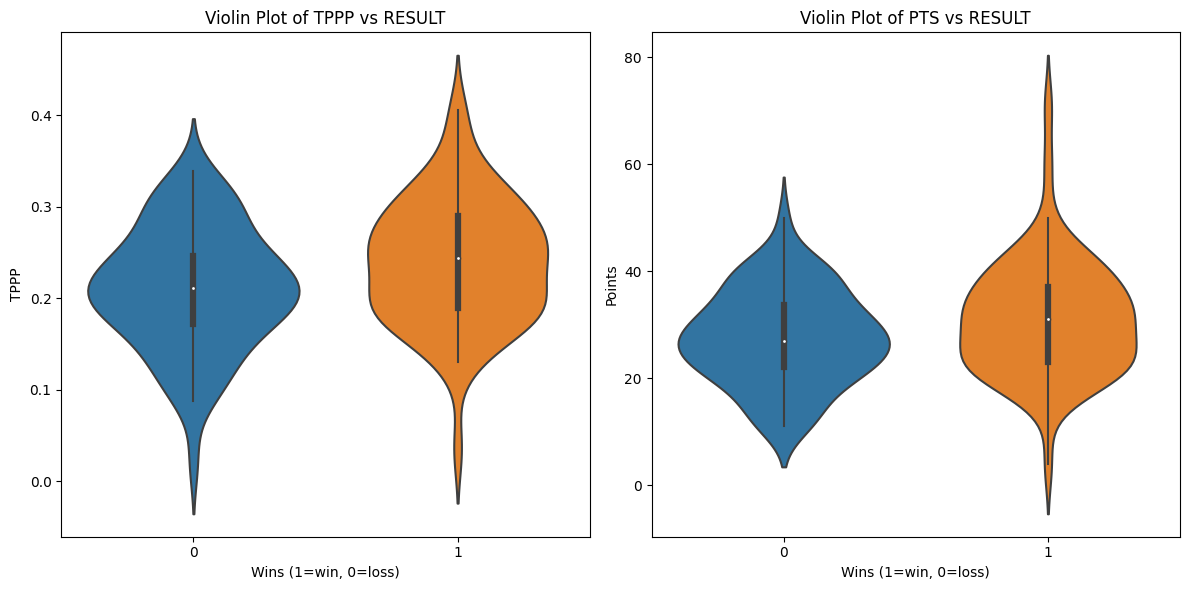

In [ ]:
# VISUALIZATION

# Create boxplot for TPPP
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) # Create two subplots side by side
sns.boxplot(x='RESULT', y='TRUE POINTS PER POSSESSION', data=dataframe, ax=ax[0])
ax[0].set_xlabel('Wins (1=win, 0=loss)')
ax[0].set_ylabel('TPPP')
ax[0].set_title('Box Plot of TPPP vs. RESULT')

# Create boxplot for PTS
sns.boxplot(x='RESULT', y='PTS', data=dataframe, ax=ax[1])
ax[1].set_xlabel('Wins (1=win, 0=loss)')
ax[1].set_ylabel('Points')
ax[1].set_title('Box Plot of PTS vs. RESULT')

# Display the plots
plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()


# Create histogram for TPPP
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) # Create two subplots side by side
win_TPPP = dataframe[dataframe['RESULT'] == 1]['TRUE POINTS PER POSSESSION']
loss_TPPP = dataframe[dataframe['RESULT'] == 0]['TRUE POINTS PER POSSESSION']
ax[0].hist(win_TPPP, bins=30, alpha=0.5, label='Wins')
ax[0].hist(loss_TPPP, bins=30, alpha=0.5, label='Losses')
ax[0].set_xlabel('TPPP')
ax[0].set_ylabel('Frequency')
ax[0].legend(loc='upper right')
ax[0].set_title('Histogram of TPPP and Wins and Losses')

# Create histogram for PTS
win_pts = dataframe[dataframe['RESULT'] == 1]['PTS']
loss_pts = dataframe[dataframe['RESULT'] == 0]['PTS']
ax[1].hist(win_pts, bins=30, alpha=0.5, label='Wins')
ax[1].hist(loss_pts, bins=30, alpha=0.5, label='Losses')
ax[1].set_xlabel('Points')
ax[1].set_ylabel('Frequency')
ax[1].legend(loc='upper right')
ax[1].set_title('Histogram of PTS and Wins and Losses')
plt.tight_layout()  # Ensures that the plots do not overlap
plt.show() # Display the plots


# Create violin plot for TPPP
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) # Create two subplots side by side
sns.violinplot(x='RESULT', y='TRUE POINTS PER POSSESSION', data=dataframe, ax=ax[0], alpha=0.5)
ax[0].set_xlabel('Wins (1=win, 0=loss)')
ax[0].set_ylabel('TPPP')
ax[0].set_title('Violin Plot of TPPP vs RESULT')

# Create violin plot for PTS
sns.violinplot(x='RESULT', y='PTS', data=dataframe, ax=ax[1])
ax[1].set_xlabel('Wins (1=win, 0=loss)')
ax[1].set_ylabel('Points')
ax[1].set_title('Violin Plot of PTS vs RESULT')
plt.tight_layout()  # Ensures that the plots do not overlap
plt.show() # Display the plots


Slope: 0.4154011480851201, Intercept: 0.13961543772737192, R-value: 0.4985685439434858


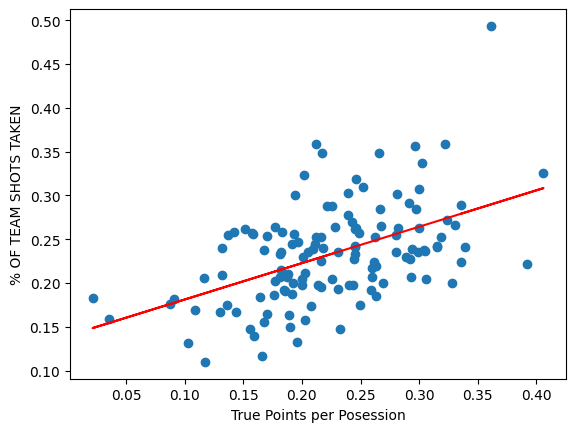

In [ ]:
x = dataframe['TRUE POINTS PER POSSESSION']
y = dataframe['% OF TEAM SHOTS TAKEN']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
correlation_coefficient = np.corrcoef(x, y)[0,1]

print(f'Slope: {slope}, Intercept: {intercept}, R-value: {correlation_coefficient}')

# Generate predicted y values for the regression line
y_pred = slope * x + intercept

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('True Points per Posession')
plt.ylabel('% OF TEAM SHOTS TAKEN')
plt.show()

- As you can see here, there is still a noticeable correlation between true points per posession and % of team shots taken, but the correlation coefficient is significantly less (0.68007 - 0.49857 ~= 0.1815)
- So clearly this partly fixes the issue of players who take a large percentage of their team's shots.

*   **There is still room for improvement.** The correlation between TPPP and FGA (field goal attempts) is very high. This means if you are taking a large amount of field goal attempts (not % of team shots) then your true points per posession will shoot up.



Slope: 0.007449398955938432, Intercept: 0.07372952311914549, R-value: 0.4895402131850788


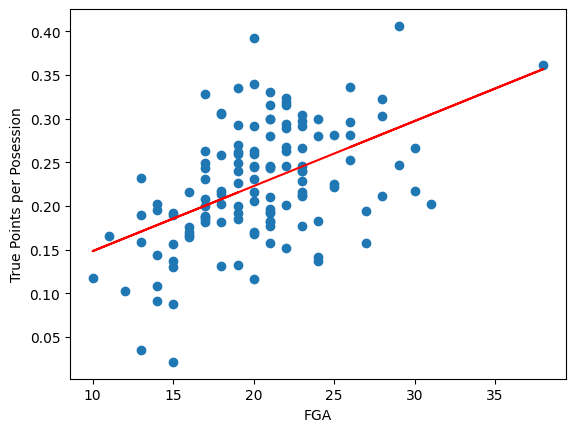

In [ ]:
x = dataframe['FGA']
y = dataframe['TRUE POINTS PER POSSESSION']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
correlation_coefficient = np.corrcoef(x, y)[0,1]

print(f'Slope: {slope}, Intercept: {intercept}, R-value: {correlation_coefficient}')

# Generate predicted y values for the regression line
y_pred = slope * x + intercept

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('FGA')
plt.ylabel('True Points per Posession')
plt.show()

*   This means a player can increase their TPPP by taking a lot of FGA. A way to counteract this is by multiplying TPPP by FG% (shots made/shots attempted). This way, your TPPP will only increase if you are **efficient**.
*   **However,** field goal percentage is a flawed stat as well. A center who is 7 feet tall is alwamost always going to have a higher field goal percentage than a guard, even if the guard is a shorter player.
*   We can counteract this by multiplying TPPP by true shooting percentage rather than field goal percentage.
*   True shooting percentage is a statistic that takes into account the fact that 3 pointers are harder to make than two pointers. This way, centers and guards who have similar scoring output will have similar true shooting percentages.
*   This is the formula for TS%
*   $TS = PTS/(2*TSA)$
*   Where $TSA = FGA + 0.44*FTA$










In [ ]:
dataframe['TSA'] = dataframe['FGA'] + 0.44 * dataframe['FTA'] # calculate TSA
dataframe['TS%'] = dataframe['PTS']/(2*dataframe['TSA']) # calculate TS%

In [ ]:
dataframe['TRUE POINTS PER POSSESSION 2'] = dataframe['TRUE POINTS PER POSSESSION'] * dataframe['TS%'] # calculate new TPPP

Slope: 0.036899110356723726, Intercept: 0.12692141384815148, R-value: 0.2649443816485566


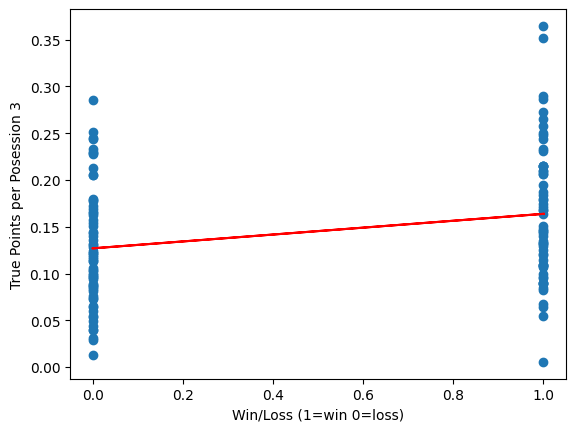

In [ ]:
x = dataframe['RESULT']
y = dataframe['TRUE POINTS PER POSSESSION 2']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
correlation_coefficient = np.corrcoef(x, y)[0,1]

print(f'Slope: {slope}, Intercept: {intercept}, R-value: {correlation_coefficient}')

# Generate predicted y values for the regression line
y_pred = slope * x + intercept

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Win/Loss (1=win 0=loss)')
plt.ylabel('True Points per Posession 2')
plt.show()



*   We now have the highest R value that we have had thus far. So, here is the formula for True Points Per Possession:

*   $TPPP = (PTS/POSS)(1-PTT)(TS)$

*   Where PTS = points in a given game
*   POSS = possessions in a given game
*   PTT = percentage of team shots taken
*   TS = true shooting percentage











## **4.) CAREER OUTCOME PREDICTION MODEL**

In this Career Outcome Prediction Model, I am going to predict the career outcome of players who were drafted in 2018 or later. Here are the career outcomes:
- Elite: a player made an all NBA team
- All-star: a player made an all star team
- Starter: a player started in at least 41 games or played at least 2000 minutes
- Rotation: a player played at least 1000 minutes.
- Roster: a player played at least 1 minute.
- Out of the league: a player does not meet any of the above criteria.
Note that a player must spend at least two seasons at any of the given cateogries to be considered a part of that category.

In [ ]:
player_data = pd.read_csv('/content/drive/MyDrive/player_stats.csv') # put the spreadsheet into a data frame
awards = pd.read_csv('/content/drive/MyDrive/awards_data.csv')

In [ ]:
player_data.head(2)

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,Solomon Jones,2006,33.0,2007,1610612737,ATL,35,0,145,...,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2


In [ ]:
awards.head(2)

,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2007,708.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN
1,2007,947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Here are the datasets we are using. player_data is a dataset from NBA.com that has individualized season data for every player in the NBA. This dataset is on a season-by-season basis, meaning there is a row of data including all of the players' stats (points, games played, etc) for every season that a player has played. So if a player has been in the NBA for five years, then he has five rows of data in the dataset.
- The awards dataset is also from NBA.com and is also on a season by season basis. This dataset contains all of the awards that a player has obtained in each season (All NBA First team, MVP, DPOY, etc.).

I first need to determine which players will be in each career outcome. Because this dataset is a on a season by season basis, this job requires a considerable amount of code:

#### Data Preparation

In [ ]:
# CREATING DATSET FOR THE MODEL

player_data_temp4 = player_data.copy() # Creates copy of player_data
awards_temp4 = awards.copy() # Creates copy of awards

player_data_temp4 = pd.merge(player_data_temp4, awards_temp4, on=['season', 'nbapersonid'], how='left') # merges player_data and awards so that they are in the same dataframe an in the correct row.
player_data_temp4 = player_data_temp4[player_data_temp4['draftyear']<=2015] # ALL DRAFT YEARS IN OR BEFORE 2015. THIS IS THE ONLY DIFFERENCE FROM QUESTION 3
def is_elite(row): # true if elite
    return row['All NBA First Team'] == 1 or row['All NBA Second Team'] == 1 or row['All NBA Third Team'] == 1 or row['Most Valuable Player_rk'] == 1 or row ['Defensive Player Of The Year_rk'] == 1
def is_starter(row): # true if starter
    if row['season'] == 2011:
        return row['games_start'] >= 33 or row['mins'] >= 1610
    elif row['season'] == 2019 or row['season'] == 2020:
        return row['games_start'] >= 36 or row['mins'] >= 1757
    else:
        return row['games_start'] >=41 or row['mins'] >=2000
def is_rotation(row): # true if rotation players
    if row['season'] == 2011:
        return row['mins'] >=865
    elif row['season'] == 2019 or row['season'] == 2020:
        return row['mins'] >=879
    else:
        return row['mins'] >= 1000
def is_out_of_league(row): # True if out of the league
    return row['mins'] == 0 or row['games'] ==0
player_data_temp4['elite'] = player_data_temp4.apply(is_elite, axis=1)
player_data_temp4['all star'] = player_data_temp4['all_star_game'] == 1
player_data_temp4['starter'] = player_data_temp4.apply(is_starter, axis=1)
player_data_temp4['rotation'] = player_data_temp4.apply(is_rotation, axis=1)
player_data_temp4['roster'] = player_data_temp4['mins'] >=1
player_data_temp4['out of the league'] = player_data_temp4.apply(is_out_of_league, axis=1)
label_order = ['elite', 'all star', 'starter', 'rotation', 'roster', 'out of the league'] # gives the label order
player_data_temp4['highest label'] = player_data_temp4[label_order].idxmax(axis=1) # only keeps the highest label (elite>allstar>starter etc.)
career_outcomes = (
    player_data_temp4.groupby('player')['highest label'] # groups by player name
    .apply(lambda x: x.value_counts().index[0] if len(x) >= 2 else None) # Checks if a player achieved a certain label for 2 years
    .value_counts() # counts occurences of each CAREER OUTCOME
    .reindex(label_order)
    .fillna(0)
)
career_outcomes['out of the league'] = 1500-(career_outcomes['elite'] +career_outcomes['all star']+career_outcomes['starter']+career_outcomes['rotation']+career_outcomes['roster'])

In [ ]:
# CREATING DATSET FOR THE MODEL.

player_data_temp5 = player_data.copy() # Creates copy of player_data
awards_temp5 = awards.copy() # Creates copy of awards

player_data_temp5 = pd.merge(player_data_temp5, awards_temp5, on=['season', 'nbapersonid'], how='left') # merges player_data and awards so that they are in the same dataframe an in the correct row.
def is_elite(row): # true if elite
    return row['All NBA First Team'] == 1 or row['All NBA Second Team'] == 1 or row['All NBA Third Team'] == 1 or row['Most Valuable Player_rk'] == 1 or row ['Defensive Player Of The Year_rk'] == 1
def is_starter(row): # true if starter
    if row['season'] == 2011:
        return row['games_start'] >= 33 or row['mins'] >= 1610
    elif row['season'] == 2019 or row['season'] == 2020:
        return row['games_start'] >= 36 or row['mins'] >= 1757
    else:
        return row['games_start'] >=41 or row['mins'] >=2000
def is_rotation(row): # true if rotation players
    if row['season'] == 2011:
        return row['mins'] >=865
    elif row['season'] == 2019 or row['season'] == 2020:
        return row['mins'] >=879
    else:
        return row['mins'] >= 1000
def is_out_of_league(row): # True if out of the league
    return row['mins'] == 0 or row['games'] ==0
player_data_temp5['elite'] = player_data_temp5.apply(is_elite, axis=1)
player_data_temp5['all star'] = player_data_temp5['all_star_game'] == 1
player_data_temp5['starter'] = player_data_temp5.apply(is_starter, axis=1)
player_data_temp5['rotation'] = player_data_temp5.apply(is_rotation, axis=1)
player_data_temp5['roster'] = player_data_temp5['mins'] >=1
player_data_temp5['out of the league'] = player_data_temp5.apply(is_out_of_league, axis=1)
label_order = ['elite', 'all star', 'starter', 'rotation', 'roster', 'out of the league'] # gives the label order
player_data_temp5['highest label'] = player_data_temp5[label_order].idxmax(axis=1) # only keeps the highest label (elite>allstar>starter etc.)
career_outcomes1 = (
    player_data_temp5.groupby('player')['highest label'] # groups by player name
    .apply(lambda x: x.value_counts().index[0] if len(x) >= 2 else None) # Checks if a player achieved a certain label for 2 years
    .value_counts() # counts occurences of each CAREER OUTCOME
    .reindex(label_order)
    .fillna(0)
)
career_outcomes1['out of the league'] = 1500-(career_outcomes1['elite'] +career_outcomes1['all star']+career_outcomes1['starter']+career_outcomes1['rotation']+career_outcomes1['roster'])

Now, here is the actual model. The first step is to train the model, and tell our model which features from the dataset we want to use to predict career outcomes.

#### Model Training and Predictions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

###############################
###############################
# FEATURES AND TARGET
###############################
###############################

# CREATE NEW DATAFRAME
player_data6 = player_data_temp4.copy() # Create copy of player_data_temp4
player_data6['ppg'] = player_data6['points']/player_data6['games'] # create points per game column which will be used for training

# CREATE FEATURES AND TARGET
features = ['ppg', 'WS', 'VORP', 'BPM','usg','efg', 'PER', 'draftpick'] # Features that the model will be trained on
target = 'highest label' # The column we are trying to predict

# DATA FILTERING
filtered_data = player_data6[player_data6['draftyear'] <= 2015]
player_name_counts = filtered_data['player'].value_counts()
# Filter players who appear at least 7 times
players_appearing_seven_or_more_times = player_name_counts[player_name_counts >= 7].index
filtered_data = filtered_data[filtered_data['player'].isin(players_appearing_seven_or_more_times)]
# Drop rows with missing values in selected features
filtered_data = filtered_data.dropna(subset=features)

###############################
###############################
# MODEL TRAINING
###############################
###############################

X_train, X_test, y_train, y_test = train_test_split(filtered_data[features], filtered_data[target], test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler() # standarize
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Multi-class logistic regression model
model = LogisticRegression(max_iter=1000, multi_class='ovr', random_state=50)
model.fit(X_train_scaled, y_train)
# Make predictions
y_pred = model.predict(X_test_scaled)
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    all star       0.50      0.03      0.05        35
       elite       0.89      0.65      0.75        51
      roster       0.77      0.96      0.86       321
    rotation       0.91      0.29      0.44       198
     starter       0.66      0.90      0.76       285

    accuracy                           0.74       890
   macro avg       0.75      0.57      0.57       890
weighted avg       0.76      0.74      0.70       890



Now, we are done training, and we need to actually predict the career outcomes of players. I chose Luka Doncic, Zion Williamson, James Wiseman, Josh Giddey, and Shai Gilgeous-Alexander because these five players provide a wide range of expected career outcomes.

Predicted Probabilities for Luka Doncic
Elite: 0.21
All star: 0.77
Starter: 0.01
Rotation: 0.00
Roster: 0.01


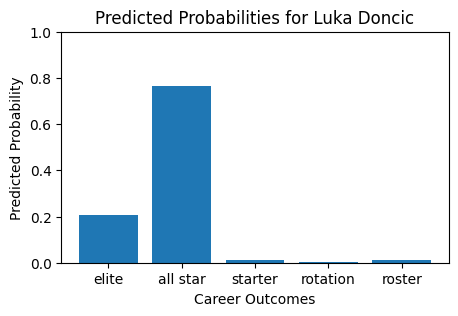

Predicted Probabilities for Zion Williamson
Elite: 0.11
All star: 0.01
Starter: 0.53
Rotation: 0.10
Roster: 0.25


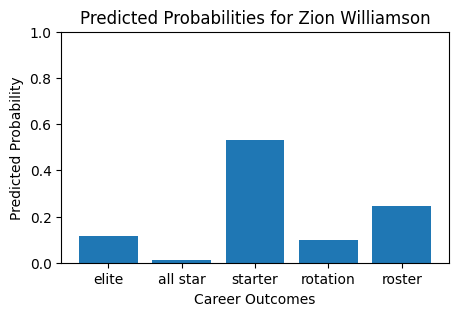

Predicted Probabilities for James Wiseman
Elite: 0.01
All star: 0.00
Starter: 0.65
Rotation: 0.22
Roster: 0.13


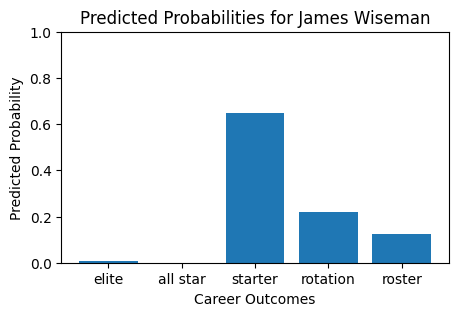

Predicted Probabilities for Josh Giddey
Elite: 0.02
All star: 0.00
Starter: 0.81
Rotation: 0.08
Roster: 0.09


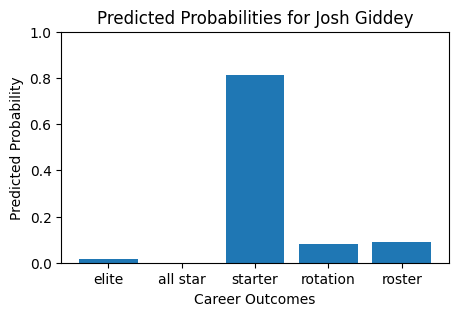

Predicted Probabilities for Shai Gilgeous-Alexander
Elite: 0.03
All star: 0.00
Starter: 0.03
Rotation: 0.31
Roster: 0.63


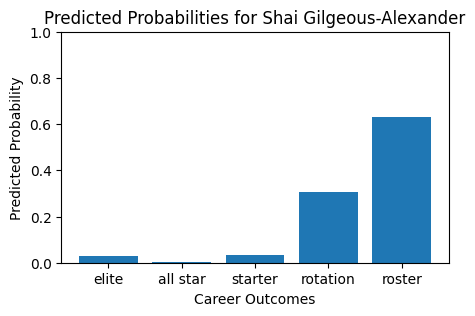

In [ ]:
###############################
###############################
# Predicting Player Outcomes
###############################
###############################

career_outcomes1 = career_outcomes1.drop('out of the league')
players_to_predict = ['Luka Doncic', 'Zion Williamson', 'James Wiseman', 'Josh Giddey', 'Shai Gilgeous-Alexander'] # the four players we are seaching for in this section
new_players_data = player_data_temp5.copy() # Create copy of player_data_temp5
new_players_data = new_players_data[new_players_data['draftyear'] >= 2018] # Filter only players drafted after 2018
new_players_data['ppg'] = new_players_data['points']/new_players_data['games'] # Create points per game column
PLAYER = 'Ja Morant'

for PLAYER in players_to_predict:
    player_features = new_players_data[new_players_data['player'] == PLAYER][features] # take the features of the current player
    player_features = player_features.dropna() # drop n/a
    player_features_scaled = scaler.transform(player_features) # standardize
    player_predicted_probs = model.predict_proba(player_features_scaled) # predict

    print("Predicted Probabilities for " + PLAYER) # print for visualization
    for outcome, prob in zip(career_outcomes1.index, player_predicted_probs[0]):
        outcome_label = outcome.capitalize() if isinstance(outcome, str) else outcome
        print(f"{outcome_label}: {prob:.2f}")

    # VISUALIZATION
    plt.figure(figsize=(5, 3))
    plt.bar(career_outcomes1.index, player_predicted_probs[0])
    plt.xlabel("Career Outcomes")
    plt.ylabel("Predicted Probability")
    plt.title("Predicted Probabilities for " + PLAYER)
    plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
    plt.show()

Here is a dataframe with all of the players who were drafted in or after 2018

In [ ]:
#########################################
#########################################
# Create Career Outcome for Every Player
#########################################
#########################################

# Create an empty list to store predicted probabilities for all players
all_players_predicted_probs = []

for player_name in new_players_data['player']: # for each player
    player_features = new_players_data[new_players_data['player'] == player_name][features]
    player_features = player_features.dropna()

    if not player_features.empty:
        player_features_scaled = scaler.transform(player_features)
        player_predicted_probs = model.predict_proba(player_features_scaled)
        player_probs = [player_name] + list(player_predicted_probs[0])
        all_players_predicted_probs.extend([player_probs])
# Create a DataFrame using the list of predicted probabilities
columns = ['player'] + list(career_outcomes1.index)
all_players_predicted_probs_df = pd.DataFrame(all_players_predicted_probs, columns=columns)
# Display the DataFrame with predicted probabilities for all players
all_players_predicted_probs_df

,player,elite,all star,starter,rotation,roster
0,Trae Young,0.125299,0.010961,0.008770,0.188210,0.666761
1,Omari Spellman,0.002765,0.000046,0.743831,0.160928,0.092431
2,Kevin Huerter,0.009536,0.000102,0.129735,0.305274,0.555353
3,Džanan Musa,0.000180,0.000235,0.795744,0.203083,0.000757
4,Rodions Kurucs,0.003955,0.000170,0.231814,0.432012,0.332049
...,...,...,...,...,...,...
548,Isaiah Todd,0.000564,0.000022,0.880957,0.110680,0.007776
549,Deni Avdija,0.006442,0.000027,0.120143,0.318635,0.554753
550,Daniel Gafford,0.000356,0.000157,0.801009,0.165803,0.032676
551,Alize Johnson,0.000470,0.000005,0.942546,0.040730,0.016249


## **5.) CONCLUSION**

- Points per game is a great stat for rough measurements of scoring in the NBA, but when closer analysis of players is needed, it has many misleading properties.
- Points per possession is a statistic that improves slightly on points per game by standardizing it, but there are still major flaws as players who take a large percentage of their team's shot attempts get a unproportional increase in their points per possession
- **My new statistic True Points Per Posession Improves on both of these stats by standardizing points per game, and reducing the impact that taking a large percentage of a team's shot attempts has on points per possession.**

- My player prediction model uses a realtively basic logistic regression technique and does a good job prediciting career outcomes for very very good players, and very very bad players. It is not great for players in the middle such as Shai Gilgeous-Alexander.'
- There is A LOT of room to add more robustness, as this is a pretty basic model.

*spreadsheets are from the following sources:*
1. www.statmuse.com (paid)
2. www.basketball-reference.com (free)
3. www.NBA.com (free)